# Feynman Full Adder

In [16]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

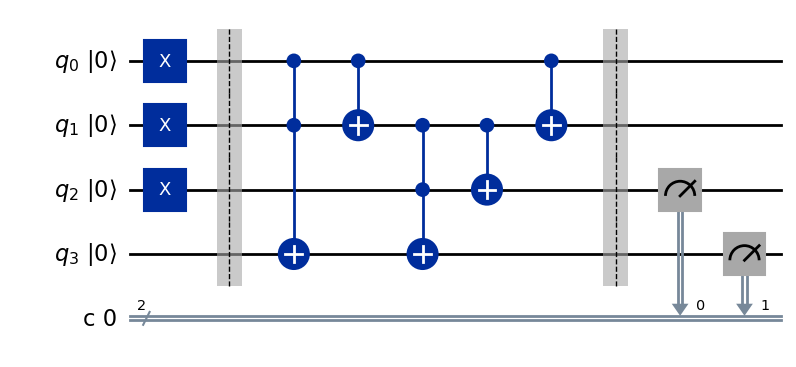

In [17]:
qc = QuantumCircuit(4, 2)
# q0 = Input A      | Output A=A'
# q1 = Input B      | Output B=B'
# q2 = Input Carry  | Output Sum
# q3 = Input 0      | Output Carry

qc.x(0)     # comment line to set q0 = A = |0> 
qc.x(1)     # comment line to set q1 = B = |0>
qc.x(2)     # comment line to set q2 = C = |0>

qc.barrier()

qc.ccx(0,1,3)   # q3 -> 0⊕A∧B = AB
qc.cx(0,1)      # q1 -> B' = A⊕B
qc.ccx(1,2,3)   # q3 -> AB⊕((A⊕B)∧Cin) = AB⊕(ACin⊕BCin) = AB⊕ACin⊕BCin = Cout
qc.cx(1,2)      # q2 -> Sum = A⊕B' = A⊕B⊕Cin
qc.cx(0,1)      # q1 -> B'' = A⊕B⊕A = B

qc.barrier()

qc.measure(2, 0)    # Sum
qc.measure(3, 1)    # Carry

qc.draw('mpl', initial_state=True)

In [18]:
simulator = AerSimulator()

transpile_circuit = transpile(qc, simulator)

result = simulator.run(transpile_circuit, shots=1000).result()

counts = result.get_counts()
print("Results:", counts)

Results: {'11': 1000}
